In [40]:
import re

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
cList = {
  "ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",  "could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
  "haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is",
  "how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have",
  "isn't": "is not","it'd": "it had","it'd've": "it would have","it'll": "it will", "it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
  "might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
  "shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is",
  "should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there had","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had",
  "we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
  "weren't": "were not","what'll": "what will","what'll've": "what will have",
  "what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have",
  "where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is",
  "why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not",
  "wouldn't've": "would not have","y'all": "you all","y'alls": "you alls","y'all'd": "you all would",
  "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "you you will","you'll've": "you you will have","you're": "you are",  "you've": "you have"
   }

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)
def removeStopWords(x):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(x)
    
    x = [w for w in word_tokens if not w in stop_words]
    return ' '.join(x)
def removeHTML(x):
    html=re.compile(r'<.*?>')
    return html.sub(r'',x)
def dataPreprocessing(x):
    # x = x.lower()
    x = removeHTML(x)
    x = re.sub("@", '',x)
    x = re.sub("'\d+", '',x)
    x = re.sub("\d+", '',x)
    x = re.sub("http\w+", '',x)
    x = re.sub(r"\s+", " ", x)
#     x = expandContractions(x)
    x = re.sub(r"\.+", ".", x)
    x = re.sub(r"\,+", ",", x)
    # x = x.strip()
    return x

In [35]:
# Load English stopwords
stop_words = stopwords.words('english')


In [26]:
import string
def remove_punctuation(text):
    """
    Remove all punctuation from the input text.
    
    Args:
    - text (str): The input text.
    
    Returns:
    - str: The text with punctuation removed.
    """
    # 使用 string.punctuation 中定义的标点符号集合来去除文本中的标点符号
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# 测试函数

In [41]:
tweets_bitcoin = pd.read_csv('../dataset/Tweet/TweetsElonMuskBitcoinFiltered.csv')


tweets_bitcoin['tweet'] = tweets_bitcoin['tweet'].apply(dataPreprocessing)
tweets_bitcoin['tweet'] = tweets_bitcoin['tweet'].apply(remove_punctuation)
tweets_bitcoin['tweet'] = tweets_bitcoin['tweet'].apply(removeStopWords)

for tweet in tweets_bitcoin["tweet"]:
    print (tweet)
    print ("---------")


vicentes Grimezsz Wan na buy Bitcoin 😉😉 tcoZbBJfuVq
---------
Bitcoin safe word
---------
Bitcoin 🤣🤣
---------
Bitcoin How much anime Bitcoin tcoitqRslFNcb
---------
jkrowling Pretty much although massive currency issuance govt central banks making Bitcoin Internet 👻 money look solid comparison
---------
jkrowling I still Bitcoins btw
---------
Bitcoin safe word
---------
Bitcoin almost bs fiat money
---------
business Tesla ’ action directly reflective opinion Having Bitcoin simply less dumb form liquidity cash adventurous enough SP company
---------
business To clear I investor I engineer I ’ even publicly traded stock besides Tesla However fiat currency negative real interest fool ’ look elsewhere Bitcoin almost bs fiat money The key word “ almost ”
---------
BTC Bitcoin anagram TBCThe Boring Company What coincidence
---------
You buy Tesla Bitcoin
---------
Tesla using internal open source software operates Bitcoin nodes directly Bitcoin paid Tesla retained Bitcoin converted fiat c

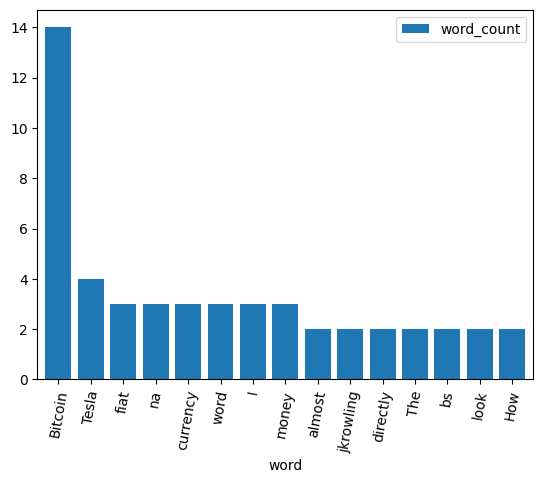

In [81]:
import matplotlib.pyplot as plt
words = tweets_bitcoin['tweet'].str.split(expand=True).stack()
# declare a np array to store the frequency of each word
data = {}

for tweet_bitcoin in tweets_bitcoin["tweet"]:
    check_visited = set()  # Use a set to keep track of visited words
    for word in words:
        if word in tweet_bitcoin and word not in check_visited:
            data[word] = data.get(word, 0) + 1
            check_visited.add(word)
            
df = pd.DataFrame(list(data.items()), columns=['word', 'word_count'])
df = df.sort_values(by =['word_count'], ascending=False)
# df = df.iloc[1:]
df[:15].plot(kind='bar', x='word', y='word_count', width=0.8)
plt.xticks(rotation=80)
plt.show()

a    1
b    2
c    3
d    4
e    5
dtype: int64


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <BarContainer object of 30 artists>)

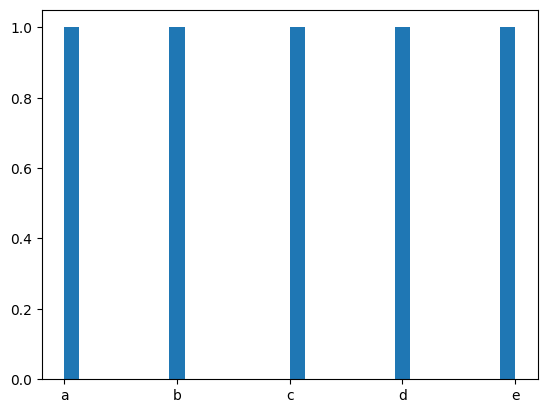

In [46]:
import pandas as pd

# Given dictionary
data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

# Convert dictionary to pandas Series
series = pd.Series(data)

print(series)
plt.hist(data, bins=len(words[:30]))